<a href="https://colab.research.google.com/github/UpamaKr/DL/blob/main/Classification_Code_Along_EDA_and_Preprocessing_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import io



from google.colab import files
 
 
uploaded = files.upload()


df = pd.read_csv(io.BytesIO(uploaded['cancer_classification.csv']))
df.head()


Saving cancer_classification.csv to cancer_classification.csv


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

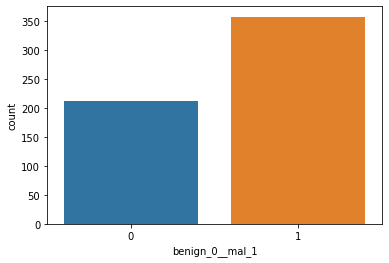

In [5]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

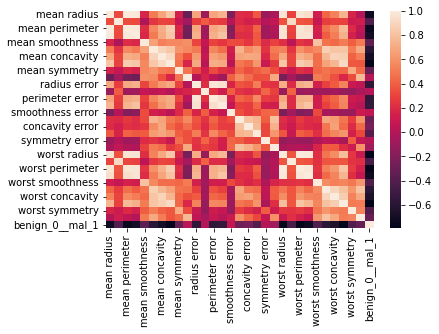

In [6]:
sns.heatmap(df.corr())

In [7]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

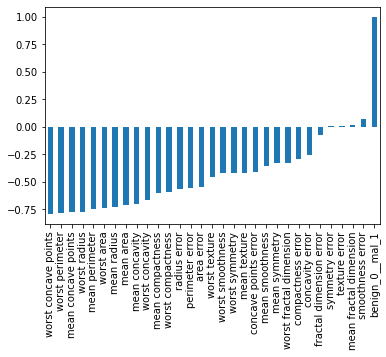

In [18]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

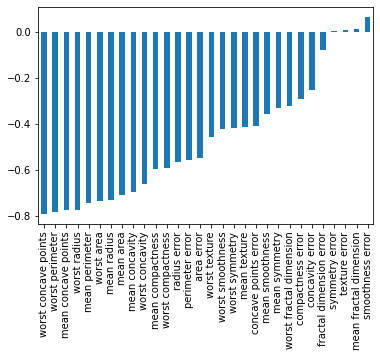

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

Train Test Split

In [10]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

Scaling the data

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Creating the model

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [16]:
X_train.shape

(426, 30)

In [17]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [19]:
model.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 3s 52ms/step - loss: 0.6706 - val_loss: 0.6470
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6273 - val_loss: 0.6066
Epoch 3/600
14/14 [==============================] - 0s 11ms/step - loss: 0.5833 - val_loss: 0.5591
Epoch 4/600
14/14 [==============================] - 0s 18ms/step - loss: 0.5344 - val_loss: 0.5052
Epoch 5/600
14/14 [==============================] - 0s 12ms/step - loss: 0.4808 - val_loss: 0.4498
Epoch 6/600
14/14 [==============================] - 0s 12ms/step - loss: 0.4297 - val_loss: 0.4034
Epoch 7/600
14/14 [==============================] - 0s 22ms/step - loss: 0.3837 - val_loss: 0.3556
Epoch 8/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3453 - val_loss: 0.3177
Epoch 9/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3088 - val_loss: 0.2820
Epoch 10/600
14/14 [==============================] - 0s 12ms/step - loss: 0.2793 - val_loss: 0.2508
Ep

In [20]:
losses = pd.DataFrame(model.history.history)

In [21]:
losses

,loss,val_loss
0,0.670637,0.647028
1,0.627340,0.606587
2,0.583327,0.559136
3,0.534371,0.505197
4,0.480766,0.449812
...,...,...
595,0.004002,0.218833
596,0.003898,0.217102
597,0.004477,0.223846
598,0.004254,0.210808


<AxesSubplot:>

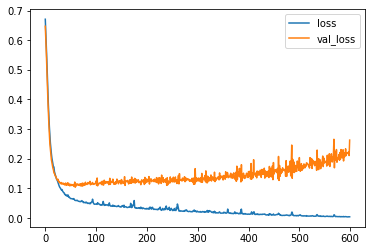

In [22]:
losses.plot()

 **Dealing with Overfitting and Evaluation with Early stopping**

this the perfect example of overfitting. we have trained the data too much. lets use Earlystopping ti track the val_loss and stop training once it begins increasing too much

In [23]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [27]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 2s 27ms/step - loss: 0.7085 - val_loss: 0.6851
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6825 - val_loss: 0.6693
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6646 - val_loss: 0.6513
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6434 - val_loss: 0.6278
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6179 - val_loss: 0.6000
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5848 - val_loss: 0.5558
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5336 - val_loss: 0.4963
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4702 - val_loss: 0.4271
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4049 - val_loss: 0.3590
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3458 - val_loss: 0.3074
Epoch 11

<AxesSubplot:>

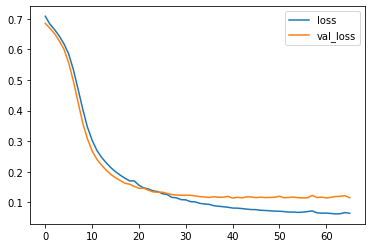

In [28]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

another method is add in dropout layers. so dropout layers will essentially turn off a percentage of nurons randomly

In [29]:
from tensorflow.keras.layers import Dropout

In [31]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 2s 21ms/step - loss: 0.6920 - val_loss: 0.6573
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6729 - val_loss: 0.6457
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6570 - val_loss: 0.6305
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6504 - val_loss: 0.6133
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6220 - val_loss: 0.5960
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6220 - val_loss: 0.5767
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5847 - val_loss: 0.5494
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5736 - val_loss: 0.5222
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5557 - val_loss: 0.4992
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5184 - val_loss: 0.4706
Epoch 11

<AxesSubplot:>

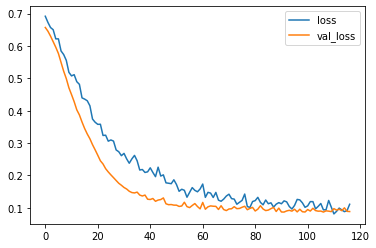

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

**Model Evaluation**

In [37]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [40]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
